# **1) Teste de Permutação I**

## **(i)**

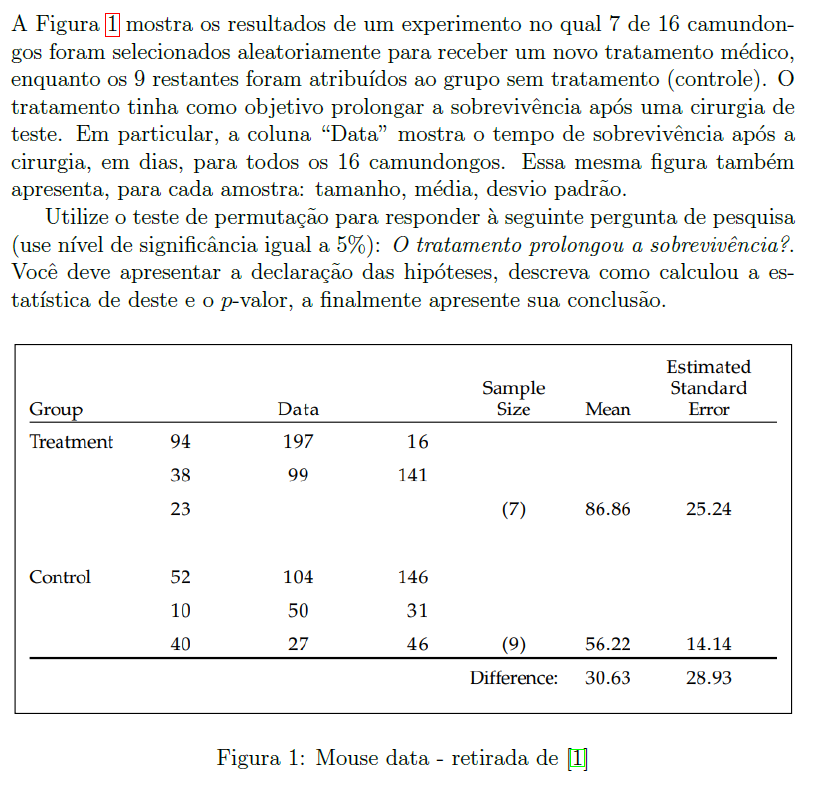

In [113]:
import numpy as np
import random

treatment = [94, 197, 16, 38, 99, 141, 23]
t_size = len(treatment)
t_mean = 86.86
t_std = 25.24

control = [52, 104, 146, 10, 50, 31, 40, 27, 46]
c_size = len(control)
c_mean = 56.22
c_std = 14.14

mean_diff = np.abs(t_mean - c_mean)
std_diff  = np.abs(t_std - c_std)
data = treatment + control

permutacoes = 10000
perm_diff = np.zeros(permutacoes)

for i in range(permutacoes):
    np.random.shuffle(data)

    t_data = data[:len(treatment)]
    perm_t_mean = np.mean(t_data)

    c_data = data[len(treatment):]
    perm_c_mean = np.mean(c_data)

    diff = np.abs(perm_t_mean - perm_c_mean)
    perm_diff[i] = diff

p = np.mean(perm_diff >= mean_diff)

print("p-valor:", p)

if p < 0.05:
    print("Rejeitar a hipótese nula: o tratamento prolongou a sobrevivência dos camundongos.")
else:
    print("Aceitar a hipótese nula: não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência dos camundongos.")

p-valor: 0.2828
Aceitar a hipótese nula: não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência dos camundongos.


**Explicação**

- Organizei dois grupos de dados, um grupo de tratamento e um grupo de controle, com médias e desvios padrão diferentes.
- Realizei uma série de permutações entre os dados de tratamento e controle para criar amostras aleatórias e calculei a diferença nas médias entre os grupos.
- Com base nas diferenças nas médias, calculei o valor-p.
- Eu comparei o valor-p com um nível de significância (0,05) para decidir se rejeitava ou aceitava a hipótese nula.

# **2) Bootstrap I**

Esta parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de "An Introduction to Statistical Learning". O conjunto de dados utilizado é o chamado conjunto de dados de Boston. Uma descrição detalhada deste conjunto de dados pode ser encontrada em http://lib.stat.cmu.edu/datasets/boston.

In [114]:
import pandas as pd
df_boston = pd.read_csv('Boston.csv')

## **(i)**

Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional da variável "medv". Chame essa estimativa de "^𝜇".

In [115]:
medv_mean = np.mean(df_boston['medv']).round(2)
print("Estimativa pontual da média populacional de 'medv':", medv_mean)

Estimativa pontual da média populacional de 'medv': 22.53


**Explicação**

- Calculei a média da colina 'medv'.

## **(ii)**

Forneça uma estimativa do erro padrão de ^𝜇. Interprete o resultado.

In [116]:
se_medv = (np.std(df_boston['medv'], ddof=1) / np.sqrt(len(df_boston['medv']))).round(4)
print("Estimativa do erro padrão de 'medv':",  se_medv)

Estimativa do erro padrão de 'medv': 0.4089


**Explicação**

- Calculei o erro padrão da coluna 'medv'.
- Como o erro é pequeno, a estimativa é precisa.

## **(iii)**

Agora, estime o erro padrão de ^𝜇 utilizando o método Bootstrap. Como essa estimativa se compara com a resposta de (ii)?

In [117]:
from sklearn.utils import resample

n = 10000
means = []

for _ in range(n):
    sample = resample(df_boston['medv'])
    mean = np.mean(sample)
    means.append(mean)
se = np.std(means)

print('Estimativa do erro padrão usando bootstrap:', round(se, 4))

Estimativa do erro padrão usando bootstrap: 0.4093


**Explicação**

- Calculei o erro padrão da média da coluna 'medv' usando bootstrap.

## **(iv)**

Com base na sua estimativa Bootstrap da parte (iii), forneça um intervalo de confiança de 95% para a média de "medv". Compare-o com os resultados obtidos usando o teste t sobre o atributo "medv.

In [118]:
alpha = 0.05
interval = np.percentile(means, [alpha/2 * 100, (1-alpha/2) * 100])
print('Intervalo de confiança usando bootstrap (Alfa = 5%):', interval)

Intervalo de confiança usando bootstrap (Alfa = 5%): [21.74168478 23.34249012]


**Explicação**

- Calculei o intervalo de confiança usando bootstrap e alfa como 5%.

## **(v)**

Com base neste conjunto de dados, forneça uma estimativa, ^𝜇med, para a mediana populacional de "medv".

In [119]:
medv_median = np.median(df_boston['medv']).round(2)
print('Mediana populacional:', medv_median)

Mediana populacional: 21.2


**Explicação**

- Calculei a mediana de Medv

## **(vi)**

Agora você deve estimar o erro padrão de ^𝜇med. Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da mediana usando o método bootstrap. Comente suas descobertas.

In [120]:
n = 10000
medians = []

for _ in range(n):
    sample = resample(df_boston['medv'])
    median = np.median(sample)
    medians.append(median)
se = np.std(medians)

print('Estimativa do erro padrão da mediana usando bootstrap:', round(se, 4))

Estimativa do erro padrão da mediana usando bootstrap: 0.3795


**Explicação**

- Calculei o erro padrão da média da coluna 'medv' usando bootstrap.

## **(vii)**

Forneça uma estimativa para o décimo percentil do atributo "medv". Chame essa quantidade de ^𝜇0.1.

In [121]:
medv_percentile_10 = np.percentile(df_boston['medv'], 10)
print('Estimativa para o décimo percentil da coluna medv:', medv_percentile_10)

Estimativa para o décimo percentil da coluna medv: 12.75


**Explicação**

- Calculei a estimativa para o décimo percentil da coluna medv.

## **(viii)**

Use o método bootstrap para estimar o erro padrão de ^𝜇0.1. Comente suas descobertas.

In [122]:
n = 10000
se_01 = []

for _ in range(n):
    sample = resample(df_boston['medv'])
    valor =  np.percentile(sample, 10)
    se_01.append(valor)
se = np.std(se_01)

print('Estimativa do erro padrão do décimo percentil usando bootstrap:', round(se, 4))

Estimativa do erro padrão do décimo percentil usando bootstrap: 0.4985


**Explicação**

- Calculei a estimativa do erro padrão do décimo percentil usando bootstrap.

# **3) Bootstrap II**

## **(i)**

Repita o teste de hipótese solicitado na parte 1 deste trabalho, desta vez usando a técnica Bootstrap. Você chegou ao mesmo resultado? Forneça uma análise comparativa dos dois resultados.

In [123]:
import numpy as np
import random

treatment = [94, 197, 16, 38, 99, 141, 23]
t_size = len(treatment)
t_mean = 86.86
t_std = 25.24

control = [52, 104, 146, 10, 50, 31, 40, 27, 46]
c_size = len(control)
c_mean = 56.22
c_std = 14.14

difference = t_mean - c_mean

permutacoes = 10000
bootstrap_diff = np.zeros(permutacoes)

for i in range(permutacoes):
    treatment_sample = np.random.choice(treatment, size=len(treatment), replace=True)
    control_sample = np.random.choice(control, size=len(control), replace=True)

    treatment_bootstrap_mean = np.mean(treatment_sample)
    control_bootstrap_mean = np.mean(control_sample)

    diff_bootstrap = treatment_bootstrap_mean - control_bootstrap_mean
    bootstrap_diff[i] = diff_bootstrap

p = np.mean(bootstrap_diff >= difference)

print("p-valor:", p)

if p < 0.05:
    print("Rejeitar a hipótese nula: o tratamento prolongou a sobrevivência dos camundongos.")
else:
    print("Aceitar a hipótese nula: não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência dos camundongos.")

p-valor: 0.5073
Aceitar a hipótese nula: não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência dos camundongos.


**Explicação**

- Realizei 10.000 permutações, onde para cada permutação, embaralhei os dados entre os grupos de tratamento e controle para criar amostras aleatórias.
- Calculei a diferença nas médias entre essas amostras permutadas.
- Comparei a diferença observada nas médias originais com as diferenças obtidas nas permutações.
- Com base nas diferenças obtidas, calculei o valor-p, indicando a probabilidade de obter resultados tão extremos quanto os observados, sob a hipótese nula.
- Comparei o valor-p com o nível de significância para decidir se rejeitar ou aceitar a hipótese nula.

# **4) Teste de Permutação vs Teste Bootstrap - I**

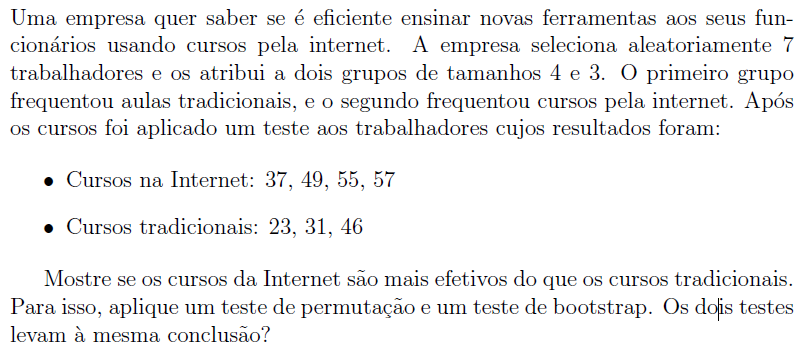

## **(i)**

Repita o teste de hipótese solicitado na parte 1 deste trabalho, desta vez usando a técnica Bootstrap. Você chegou ao mesmo resultado? Forneça uma análise comparativa dos dois resultados.

In [134]:
internet = [37, 49, 55, 57]
i_mean = np.mean(internet)

traditional = [23, 31, 46]
t_mean = np.mean(traditional)

n = 10000
mean_diff = i_mean - t_mean
data = np.concatenate((internet, traditional))

perm_diff = np.zeros(n)
bs_diff = np.zeros(n)

for i in range(n):
    np.random.shuffle(data)
    internet_sample = np.random.choice(internet, size=len(internet), replace=True)
    traditional_sample = np.random.choice(traditional, size=len(traditional), replace=True)

    i_mean_perm = np.mean(data[:len(internet)])
    t_mean_perm = np.mean(data[len(internet):])
    diff_perm = i_mean_perm - t_mean_perm
    perm_diff[i] = diff_perm
    p_perm = np.mean(perm_diff >= mean_diff)

    i_mean_bs = np.mean(internet_sample)
    t_mean_bs = np.mean(traditional_sample)
    diff_bs = i_mean_bs - t_mean_bs
    bs_diff[i] = diff_bs
    p_bs = np.mean(bs_diff >= mean_diff)

alpha = .05

print("p-valor da permutação:", p_perm)
print("p-valor do bootstrap:", p_bs)

if p_perm < alpha:
    print("Permutação - rejeita a hipótese nula: cursos da Internet são mais efetivos do que cursos tradicionais.")
else:
    print("Permutação - aceita a hipótese nula: cursos da Internet não são mais efetivos do que cursos tradicionais.")

if p_bs < alpha:
    print("Bootstrap - rejeita a hipótese nula: cursos da Internet são mais efetivos do que cursos tradicionais.")
else:
    print("Bootstrap - aceita a hipótese nula: cursos da Internet não são mais efetivos do que cursos tradicionais")

p-valor da permutação: 0.0592
p-valor do bootstrap: 0.5248
Permutação - aceita a hipótese nula: cursos da Internet não são mais efetivos do que cursos tradicionais.
Bootstrap - aceita a hipótese nula: cursos da Internet não são mais efetivos do que cursos tradicionais


**Explicação**

- Calculei as médias dos grupos de cursos na Internet e cursos tradicionais.
- Combinei os dados dos dois grupos em um único conjunto.
- Realizei 10.000 permutações e bootstraps.
- Comparei as diferenças obtidas nas permutações e bootstraps com a diferença original entre as médias.
- Calculei os valores-p para ambas as abordagens de permutação e bootstrap com um nível de significância de 0,05.

# **5) Teste de Permutação vs Teste Bootstrap - II**

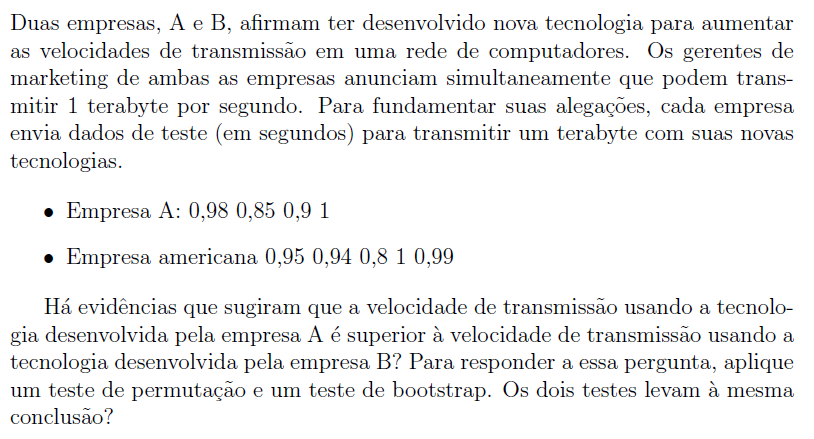

## **(i)**

Repita o teste de hipótese solicitado na parte 1 deste trabalho, desta vez usando a técnica Bootstrap. Você chegou ao mesmo resultado? Forneça uma análise comparativa dos dois resultados.

In [133]:
a = [0.98, 0.85, 0.9, 1]
a_mean = np.mean(a)

b = [0.95, 0.94, 0.8, 1, 0.99]
b_mean = np.mean(b)

n = 10000
mean_diff = a_mean - b_mean
data = np.concatenate((a, b))

perm_diff = np.zeros(n)
bs_diff = np.zeros(n)

for i in range(n):
    np.random.shuffle(data)
    a_sample = np.random.choice(a, size=len(a), replace=True)
    b_sample = np.random.choice(b, size=len(b), replace=True)

    a_mean_perm = np.mean(data[:len(a)])
    b_mean_perm = np.mean(data[len(a):])
    diff_perm = a_mean_perm - b_mean_perm
    perm_diff[i] = diff_perm
    p_perm = np.mean(perm_diff >= mean_diff)

    a_mean_bs = np.mean(a_sample)
    b_mean_bs = np.mean(b_sample)
    diff_bs = a_mean_bs - b_mean_bs
    bs_diff[i] = diff_bs
    p_bs = np.mean(bs_diff >= mean_diff)

alpha = .05

print("p-valor da permutação:", p_perm)
print("p-valor do bootstrap:", p_bs)

if p_perm < alpha:
    print("Permutação - rejeita a hipótese nula: velocidade de transmissão da empresa A é superior à da empresa B.")
else:
    print("Permutação - aceita a hipótese nula: velocidade de transmissão da empresa A não é superior à da empresa B.")

if p_bs < alpha:
    print("Bootstrap - rejeita a hipótese nula: velocidade de transmissão da empresa A é superior à da empresa B.")
else:
    print("Bootstrap - aceita a hipótese nula: velocidade de transmissão da empresa A não é superior à da empresa B.")

p-valor da permutação: 0.5415
p-valor do bootstrap: 0.4885
Permutação - aceita a hipótese nula: velocidade de transmissão da empresa A não é superior à da empresa B.
Bootstrap - aceita a hipótese nula: velocidade de transmissão da empresa A não é superior à da empresa B.


**Explicação**

- Calculei as médias dos grupos da empresa A e empresa B.
- Combinei os dados dos dois grupos em um único conjunto.
- Realizei 10.000 permutações e bootstraps.
- Comparei as diferenças obtidas nas permutações e bootstraps com a diferença original entre as médias.
- Calculei os valores-p para ambas as abordagens de permutação e bootstrap com um nível de significância de 0,05.

# **6) Regressão Linear**

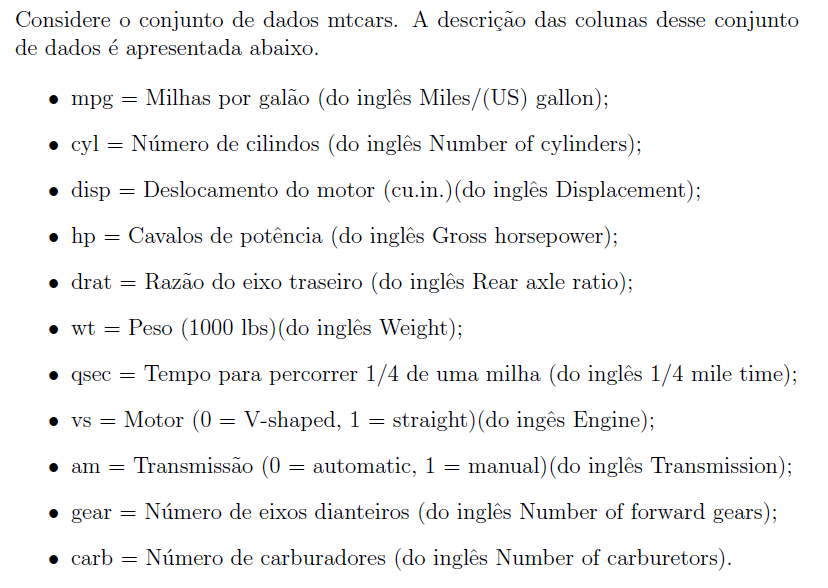

In [126]:
import pandas as pd
cars = pd.read_csv('mtcars.csv')

## **(i)**

Gere a matriz de correlação entre as variáveis deste conjunto de dados.

In [127]:
correlation = cars.corr()
correlation

<ipython-input-127-779cd11940e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cars.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


**Explicação**

- Gerei a matriz de correlação entre as variáveis do conjunto de dados.

## **(ii)**

Interprete o resultado obtido para as variáveis "mpg" e "cyl".

**Explicação**

- O coeficiente de correlação é -0.852162: forte correlação negativa.

- Em geral, à medida que o número de cilindros aumenta, a eficiência em termos de milhas por galão tende a diminuir. Veículos com mais cilindros tendem a ter uma menor eficiência de combustível, refletida por uma menor quantidade de milhas percorridas por galão.

## **(iii)**

Utilize a biblioteca Seaborn para gerar uma perspectiva gráfica da matriz de correlação.

<Axes: >

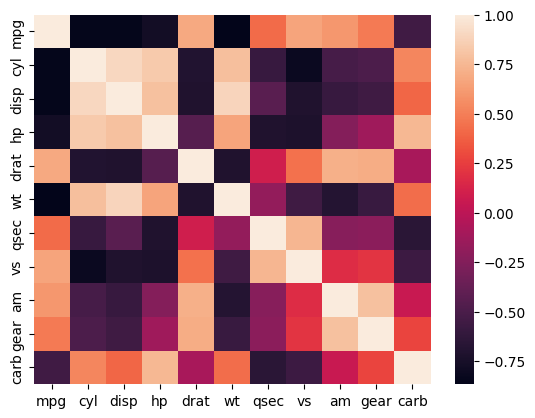

In [128]:
import seaborn as sns
sns.heatmap(correlation)

**Explicação**

- Utilizei a biblioteca Seaborn para gerar uma perspectiva gráfica da matriz de correlação.

## **(iv)**

Encontre a equação de regressão considerando que a variável independente é "cyl" e a variável dependente é "mpg".

In [129]:
import pandas as pd
from scipy import stats

slope, intercept, _, _, _ = stats.linregress(cars.cyl, cars.mpg)
print(f"y = {round(intercept, 4)} + {round(slope, 4)}x")

y = 37.8846 + -2.8758x


**Explicação**

- Utilizei a função linregress para realizar uma regressão linear entre cyl e mpg e achar a inclinação e interceptação.
- Imprimi a equação da linha de regressão, mostrando a relação linear entre as variáveis x e y.

## **(v)**

Gere o gráfico da equação de regressão do item anterior.

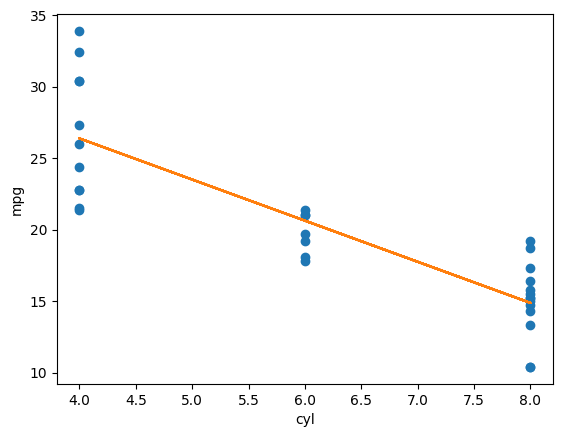

In [130]:
import matplotlib.pyplot as plt

regression = stats.linregress(cars.cyl, cars.mpg)
plt.plot(cars.cyl, cars.mpg, 'o')
plt.plot(cars.cyl, regression.intercept + regression.slope*cars.cyl)

plt.xlabel("cyl")
plt.ylabel("mpg")
plt.show()

**Explicação**

- Gerei o gráfico da equação de regressão do item anterior.

## **(vi)**

Qual é o consumo previsto (em milhas por galão) para um veículo com 20 cilindros?

In [131]:
cc = 20
slope, intercept, _, _, _ = stats.linregress(cars.cyl, cars.mpg)
print('Consumo previsto:', round(intercept + slope * cc, 2))

Consumo previsto: -19.63


**Explicação**

- Calculei o consumo previsto para um veículo com 20 cilindros utilizando os dados de lingress.